In [2]:
#!pip install cfgrib
#!pip install --upgrade xarray

In [3]:
# importing os module
import os

import numpy as np
import pandas as pd
import geopandas as gpd

import xarray as xr
import cfgrib


import matplotlib.pyplot as plt

In [4]:
path = r"E:\Projects\Omdema\Bondy\Data\GeoData_Source\Meteorological_Data"
fname_temp = "ERA5_Land_2020_2022_t2m.grib"
fname_prec = "ERA5_Land_2020_2022_tp.grib"
fname_evat = "ERA5_Land_2020_2022_te.grib"


In [5]:
path_Parcels = r"E:\Projects\Omdema\Bondy\Data\Localisation des sites\BondyPlantedParcels.geojson"

In [10]:
path_fname = os.path.join(path, fname_temp)

#The data has subsurface and surface data as well as edition conflicts:
#The below statement will give access to temperature (t2m) and total precipitation (tp)
ds_temp=xr.open_dataset(path_fname, engine="cfgrib") #,
                     #backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface',
                     #                                  'edition': 1}})

path_fname = os.path.join(path, fname_prec)
ds_prec=xr.open_dataset(path_fname, engine="cfgrib") #,
                     #backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface',
                     #                                  'edition': 1}})

path_fname = os.path.join(path, fname_evat)
ds_evap=xr.open_dataset(path_fname, engine="cfgrib") #,
                     #backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface',
                     #                                  'edition': 1}})

In [11]:
#ds_temp #time: 852step: 4 latitude: 164 longitude: 94
#ds_prec #time: 852step: 4 latitude: 164 longitude: 94
ds_evap #time: 852step: 4 latitude: 164 longitude: 94 // Evaporation

<xarray.Dataset>
Dimensions:     (time: 852, step: 4, latitude: 164, longitude: 94)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2019-12-31 2020-01-01 ... 2022-04-30
  * step        (step) timedelta64[ns] 06:00:00 12:00:00 ... 1 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 -11.2 -11.3 -11.4 -11.5 ... -27.3 -27.4 -27.5
  * longitude   (longitude) float64 42.2 42.3 42.4 42.5 ... 51.2 51.3 51.4 51.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    e           (time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-07-14T23:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [13]:
#opening the geojson file
gdf_BondyPlantedParcels = gpd.read_file(path_Parcels)
#gdf_BondyPlantedParcels

In [14]:
# looping through the parcels:
# to check if the polygons are valid
for index, row in gdf_BondyPlantedParcels.iterrows():
    print(index, row.geometry.centroid.x)

0 47.573648560976864
1 47.570589501275855
2 47.57812267193405
3 47.5785510932013
4 47.57886117613678
5 47.57686132860349
6 47.58018302689775
7 47.58088304532397
8 47.57866738588959
9 47.57673368074156
10 47.576588551344585
11 47.578108664870875
12 47.5685180133261
13 47.57609350830453
14 47.58081787621365
15 47.58274047618942
16 47.583323693081084
17 47.579551498038846
18 47.58144427295999
19 47.580568195678495
20 47.59264685811807
21 47.5919996904576
22 47.59056082959392
23 47.58825312008494
24 47.59208895937775
25 47.59176076147681
26 47.59095277929966
27 47.59207681411295
28 47.58666104032173
29 47.58382326366923
30 47.5884258688464
31 47.58965767396205
32 47.58831098607938
33 47.58163083371553
34 47.582341029662324
35 47.58348861879882
36 47.58346272280446
37 47.58305243297828
38 47.58359890038724
39 47.58272017981659
40 47.58323326737474
41 47.58046022913961
42 47.58992810997275
43 47.5898894877738
44 47.59001825750164
45 47.59093758111481
46 47.585738350877996
47 47.5869765345187

In [67]:
# we only check one polygon in this code
# the code can take any polygon in the list
parcel_ID = 253


parcel_polygon = gdf_BondyPlantedParcels.iloc[[parcel_ID]].copy()
parcel_polygon = parcel_polygon.to_crs(4087) #projecting the polygon
parcel_point = parcel_polygon.centroid #getting the point
parcel_point = parcel_point.to_crs(crs=4326) #back to degrees

In [68]:
lat = parcel_point.y.values
lon = parcel_point.x.values

print(lat, " // ", lon  )

[-15.75507582]  //  [46.38992064]


In [69]:
y_grid = int(0.2 * np.round(lat[0] / 0.2)*10)/10
x_grid = int(0.2 * np.round(lon[0] / 0.2)*10)/10

print(y_grid, " // ", x_grid )

-15.8  //  46.4


In [70]:
#Subset on location
data_temp = ds_temp.sel(longitude=x_grid  , latitude=y_grid  , method='nearest') 
data_prec = ds_prec.sel(longitude=x_grid  , latitude=y_grid  , method='nearest') 
data_evap = ds_evap.sel(longitude=x_grid  , latitude=y_grid  , method='nearest') 


In [71]:
#Subset on time
slice_start = "2020-08-01T00"
slice_end = "2022-12-31T00"

data_temp = data_temp.sel(time=slice(slice_start, slice_end))
data_prec = data_prec.sel(time=slice(slice_start, slice_end))
data_evap = data_evap.sel(time=slice(slice_start, slice_end))

In [72]:
data_temp

<xarray.Dataset>
Dimensions:     (time: 638, step: 4)
Coordinates:
    number      int32 0
  * time        (time) datetime64[ns] 2020-08-01 2020-08-02 ... 2022-04-30
  * step        (step) timedelta64[ns] 06:00:00 12:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    float64 -15.8
    longitude   float64 46.4
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (time, step) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-07-14T23:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [73]:
df_prec = data_prec.to_dataframe()
df_evap = data_evap.to_dataframe()

In [74]:
df_prec.reset_index()
df_prec.set_index(df_air_temp.valid_time);

df_evap.reset_index()
df_evap.set_index(df_air_temp.valid_time);

In [75]:
air_temp = data_temp.t2m - 273.15

In [76]:
df_air_temp = air_temp.to_dataframe()

df_air_temp.reset_index()
df_air_temp.set_index(df_air_temp.valid_time);

df_air_temp

number  surface  latitude  longitude  \
time       step                                                    
2020-08-01 0 days 06:00:00       0      0.0     -15.8       46.4   
           0 days 12:00:00       0      0.0     -15.8       46.4   
           0 days 18:00:00       0      0.0     -15.8       46.4   
           1 days 00:00:00       0      0.0     -15.8       46.4   
2020-08-02 0 days 06:00:00       0      0.0     -15.8       46.4   
...                            ...      ...       ...        ...   
2022-04-29 1 days 00:00:00       0      0.0     -15.8       46.4   
2022-04-30 0 days 06:00:00       0      0.0     -15.8       46.4   
           0 days 12:00:00       0      0.0     -15.8       46.4   
           0 days 18:00:00       0      0.0     -15.8       46.4   
           1 days 00:00:00       0      0.0     -15.8       46.4   

                                    valid_time        t2m  
time       step                                            
2020-08-01 0 days 06:00:00 2020-08-01 06:00:00  25.557770  
           0 days 12:00:00 2020-08-01 12:00:00  32.623688  
           0 days 18:00:00 2020-08-01 18:00:00  27.357819  
           1 days 00:00:00 2020-08-02 00:00:00  22.260406  
2020-08-02 0 days 06:00:00 2020-08-02 06:00:00  23.594635  
...                                        ...        ...  
2022-04-29 1 days 00:00:00 2022-04-30 00:00:00  23.534088  
2022-04-30 0 days 06:00:00 2022-04-30 06:00:00  26.690338  
           0 days 12:00:00 2022-04-30 12:00:00  31.462311  
           0 days 18:00:00 2022-04-30 18:00:00  26.724030  
           1 days 00:00:00 2022-05-01 00:00:00  24.593658  

[2552 rows x 6 columns]

<AxesSubplot:xlabel='valid_time'>

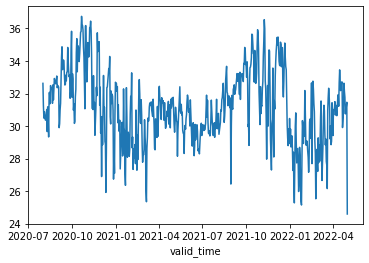

In [77]:
gb_air_temp = df_air_temp.groupby([df_air_temp['valid_time'].dt.date]).max()
gb_air_temp.t2m.plot()

<AxesSubplot:xlabel='valid_time'>

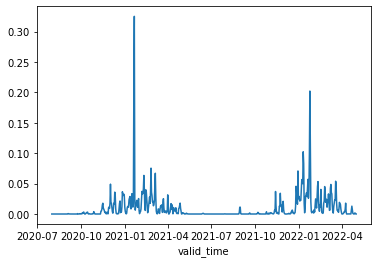

In [78]:
gb_prec = df_prec.groupby([df_prec['valid_time'].dt.date]).sum()
gb_prec.tp.plot()

<AxesSubplot:xlabel='valid_time'>

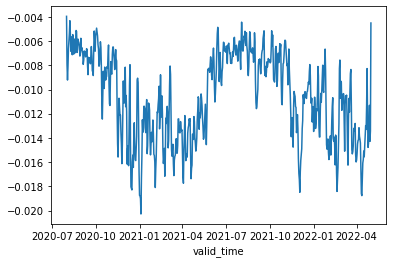

In [79]:
gb_evap = df_evap.groupby([df_evap['valid_time'].dt.date]).sum()
gb_evap.e.plot()

In [ ]:
temp = data.t2m
prec = data.tp

In [ ]:
df_temp  = temp.to_dataframe()
df_prec  = prec.to_dataframe()

In [ ]:
df_temp


<span style="font-size:25px"><b>Experiments</b></span>

In [ ]:
ds_2022

In [ ]:
sorted(ds_2022.variables)

In [ ]:
var = ds_2022.variables['t2m']

In [ ]:
var
#var.mean() - 273.15

In [ ]:
len(ds_2022.longitude)

In [ ]:


plt.imshow(var[50, 2, :, :])

In [ ]:
temp1d = var.isel(latitude=100, longitude=50)
temp1d.plot()

In [ ]:
air = ds_2022.t2m - 273.15

In [ ]:
air1d = air.isel(latitude=100, longitude=50)

In [ ]:
#air1d = air1d.assign_coords(valid_time=air1d.time + air1d.step)

#air1d.set_index(air1d.valid_time)

#air1d.plot()

In [ ]:
df_air1d = air1d.to_dataframe()

In [ ]:
df_air1d#.plot(x=valid_time, y=t2m)

In [ ]:
df_air1d.reset_index()
df_air1d.set_index(df_air1d.valid_time);

In [ ]:
df_air1d.t2m.plot()

In [ ]:
gb_air1d = df_air1d.groupby([df_air1d['valid_time'].dt.date]).max()

In [ ]:
gb_air1d.t2m.plot()

In [ ]:
tp = ds_2022.tp

In [ ]:
tp

In [ ]:
tp1d = tp.isel(latitude=100, longitude=50)

In [ ]:
df_tp = tp1d.to_dataframe()

In [ ]:
df_tp

In [ ]:
df_tp.reset_index()
df_tp.set_index(df_tp.valid_time, inplace=True);

In [ ]:
df_tp

In [ ]:
df_tp.tp.plot()

In [ ]:
gb_tp = df_tp.groupby([df_tp['valid_time'].dt.date]).sum()

In [ ]:
gb_tp.tp.plot()